# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
pd.__version__

'1.4.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [8]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [9]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [72]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

KeyboardInterrupt: 

In [76]:
print(cast.head(10))
print(cast.type.unique())

                                                title  year  \
0                                      Closet Monster  2015   
1                                     Suuri illusioni  1985   
2                                 Battle of the Sexes  2017   
8   Lapis, Ballpen at Diploma, a True to Life Journey  2014   
10                            When the Man Went South  2014   
11                            Little Angel (Angelita)  2015   
16                                    My Song for You  2010   
17                                    My Song for You  2010   
19                               Mariano Mison... NBI  1997   
25                                  Pelotazo nacional  1993   

                          name   type               character     n  
0                     Buffy #1  actor                 Buffy 4  31.0  
1                       Homo $  actor                  Guests  22.0  
2                      $hutter  actor         Bobby Riggs Fan  10.0  
8    Jori ' Danilo' Jurado

## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [12]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [13]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [14]:
len(movies)

244914

### List all Batman movies ever made

In [15]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [16]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [17]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies:', len(hp_df))
hp_df.head(10)

Total Harry Potter Movies: 8


,title,year
50581,Harry Potter and the Order of the Phoenix,2007
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
109213,Harry Potter and the Half-Blood Prince,2009
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
187926,Harry Potter and the Goblet of Fire,2005
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [18]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [20]:
len(movies[movies['year'] == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [23]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [24]:
len(movies[movies.title == "Hamlet"])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [34]:
hamlet_df = movies[movies.title == "Hamlet"]
hamlet_df.sort_values('year', ascending = True)


1910


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [36]:
incep_df = cast[cast.title=="Inception"]
incep_df.isna().sum()

title         0
year          0
name          0
type          0
character     0
n            27
dtype: int64

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [39]:
incep_df.count()

title        78
year         78
name         78
type         78
character    78
n            51
dtype: int64

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [40]:
incep_top10 = incep_df[incep_df.n <= 10]
incep_top10.sort_values('n', ascending=True)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [43]:
ad_df = cast[cast.character == 'Albus Dumbledore']
print(ad_df)

                                             title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
947789   actor  Albus Dumbledore  32.0  
947790   actor  Albus Du

In [46]:
print(ad_df['name'].unique())

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [47]:
keanu_df = cast[cast.name == 'Keanu Reeves']
print(len(keanu_df))

62


In [63]:
keanu99 = keanu_df[keanu_df.year >= 1999]
keanu99.dropna(inplace=True)
print(keanu99.sort_values('year'))

                                  title  year          name   type  \
1892370                     Me and Will  1999  Keanu Reeves  actor   
1892369                     Me and Will  1999  Keanu Reeves  actor   
1892390                      The Matrix  1999  Keanu Reeves  actor   
1892398                     The Watcher  2000  Keanu Reeves  actor   
1892397                The Replacements  2000  Keanu Reeves  actor   
1892387                        The Gift  2000  Keanu Reeves  actor   
1892383                  Sweet November  2001  Keanu Reeves  actor   
1892358                       Hard Ball  2001  Keanu Reeves  actor   
1892379          Something's Gotta Give  2003  Keanu Reeves  actor   
1892391             The Matrix Reloaded  2003  Keanu Reeves  actor   
1892392          The Matrix Revolutions  2003  Keanu Reeves  actor   
1892351                    Ellie Parker  2005  Keanu Reeves  actor   
1892348                     Constantine  2005  Keanu Reeves  actor   
1892400             

C:\Users\kayla.wilding\AppData\Local\Temp\ipykernel_6696\2016390781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keanu99.dropna(inplace=True)


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [58]:
print(len(cast[(cast.year >= 1950) & (cast.year <= 1960)]))

234635


In [59]:
print(len(cast[(cast.year >= 2007) & (cast.year <= 2017)]))

1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [77]:
post2k = cast[(cast.year >= 2000)]
post2klead = post2k.dropna()
print(len(post2klead))

1062278


In [71]:
print(post2k.isna().sum())

title        0
year         0
name         0
type         0
character    0
n            0
dtype: int64


In [78]:
print(post2k.isna().sum())

title        0
year         0
name         0
type         0
character    0
n            0
dtype: int64


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [79]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

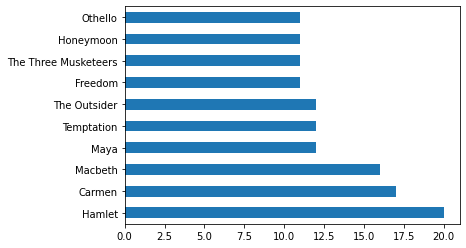

In [80]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [81]:
top_three = movies.year.value_counts()[:3]
top_three

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:>

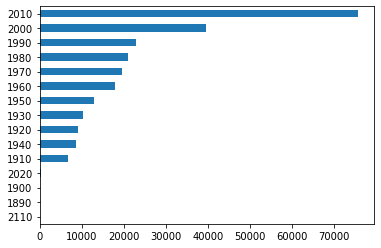

In [95]:
movies['decade'] = (movies.year//10)*10
movie_decades = movies.decade.value_counts()
movie_decades.sort_values().plot(kind = 'barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [98]:
top_ten_chars = cast.character.value_counts()[:10]
top_ten_chars

Himself      7806
Dancer       5635
Extra        4299
Doctor       3991
Nurse        3327
Policeman    3254
Bartender    2889
Reporter     2722
Herself      2654
Waitress     2312
Name: character, dtype: int64

In [102]:
print(cast.columns)

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')


In [104]:
herself_df = cast[cast.character == 'Herself']
top_ten_herself = herself_df.name.value_counts()[:10]
top_ten_herself

Mar?a Luisa (V) Mart?n       9
Joyce Brothers               9
Luisa Horga                  9
Mar?a Isabel (III) Mart?n    6
In?s J. Southern             6
Estrella Borja               5
Marina Revilla               5
Marta Berrocal               5
?ngela Silv?n                5
Aleiska von Lippke           5
Name: name, dtype: int64

In [105]:
himself_df = cast[cast.character == 'Himself']
top_ten_himself = himself_df.name.value_counts()[:10]
top_ten_himself

Ron Jeremy                   17
Manuel Valent?n-Fdez.         9
Shaquille O'Neal              8
Diego Aramburu-Zabala         8
Miguel Cuesta                 7
Abraham Torres                7
Manuel Jos? Valent?n-Fdez     7
Cayetano Guerra               7
Ed Koch                       6
Maxime Callico                6
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [106]:
cast.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

In [111]:
zombie_df = cast[cast.character.str.startswith('Zombie')]
topzombieroles = zombie_df.character.value_counts()[:10]
topzombieroles

Zombie                             2068
Zombie #1                            19
Zombie (segment "Lost Command")      16
Zombie in the Woods                  14
Zombie (segment "Z-Day")             13
Zombie Dancer                        13
Zombie (segment "Gunaw")             12
Zombie adulte                        12
Zombie #2                            12
Zombie #3                            12
Name: character, dtype: int64

In [112]:
police_df = cast[cast.character.str.startswith('Police')]
toppoliceroles = police_df.character.value_counts()[:10]
toppoliceroles

Policeman              3254
Police Officer         1777
Police Inspector        425
Police Sergeant         304
Police                  275
Policewoman             272
Police Chief            247
Police Commissioner     219
Policeman #2            206
Policeman #1            205
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:>

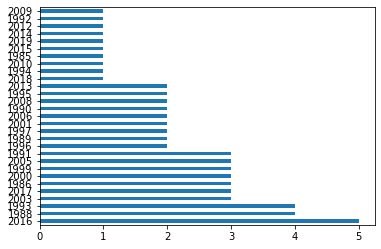

In [116]:
keanu_df.columns
keanuyears = keanu_df.year.value_counts()
keanuyears.plot(kind='barh')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [117]:
keanu_df.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

<AxesSubplot:>

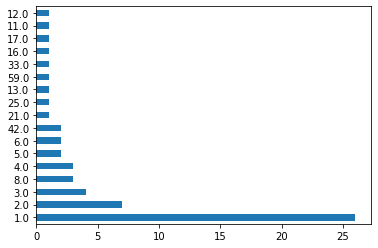

In [118]:
keanuroles = keanu_df.n.value_counts()
keanuroles.plot(kind='barh')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

C:\Users\kayla.wilding\AppData\Local\Temp\ipykernel_6696\740388383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_df['decade']=(hamlet_df.year // 10) * 10


<AxesSubplot:>

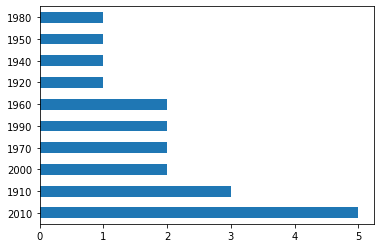

In [119]:
hamlet_df['decade']=(hamlet_df.year // 10) * 10
hamletyears = hamlet_df.decade.value_counts()
hamletyears.plot(kind='barh')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [121]:
print(len(cast[(cast.year >= 1950) & (cast.year <= 1960) & (cast.n <= 10)]))

88157


In [122]:
print(len(cast[(cast.year >= 2000) & (cast.year <= 2009) & (cast.n <= 10)]))

204299


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [123]:
cast.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

In [171]:
frank_df = cast[cast.name == 'Frank Oz']
frank_df['moviecount'] = frank_df.groupby('title')['title'].transform('count')
frankcount = frank_df[frank_df.moviecount > 1]
frankcount = frankcount.drop_duplicates(subset=['title'])
frankcount.sort_values(by='year')
print(frankcount.head(10))

                                        title  year      name   type  \
1723598        An American Werewolf in London  1981  Frank Oz  actor   
1723601                      Follow That Bird  1985  Frank Oz  actor   
1723608                Muppet Treasure Island  1996  Frank Oz  actor   
1723612                    Muppets from Space  1999  Frank Oz  actor   
1723625  The Adventures of Elmo in Grouchland  1999  Frank Oz  actor   
1723629                      The Dark Crystal  1982  Frank Oz  actor   
1723632                The Great Muppet Caper  1981  Frank Oz  actor   
1723638            The Muppet Christmas Carol  1992  Frank Oz  actor   
1723645                      The Muppet Movie  1979  Frank Oz  actor   
1723653            The Muppets Take Manhattan  1984  Frank Oz  actor   

                                       character     n  moviecount  
1723598                              Mr. Collins  13.0           2  
1723601                           Cookie Monster   3.0           3  


C:\Users\kayla.wilding\AppData\Local\Temp\ipykernel_6696\354891411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frank_df['moviecount'] = frank_df.groupby('title')['title'].transform('count')


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [175]:
frank_df = cast[cast.name == 'Frank Oz']
frank_df['charcount'] = frank_df.groupby('character')['character'].transform('count')
frankcount = frank_df[frank_df.charcount > 1]
frankcount = frankcount.drop_duplicates(subset=['character'])
dupchars = frankcount.character.values.tolist()
print(dupchars)

['Miss Piggy', 'Cookie Monster', 'Bert', 'Grover', 'Fozzie Bear', 'Sam the Eagle', 'Animal', 'Yoda']


C:\Users\kayla.wilding\AppData\Local\Temp\ipykernel_6696\3457049324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frank_df['charcount'] = frank_df.groupby('character')['character'].transform('count')


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

In [ ]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

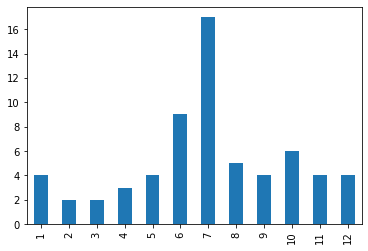

In [176]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

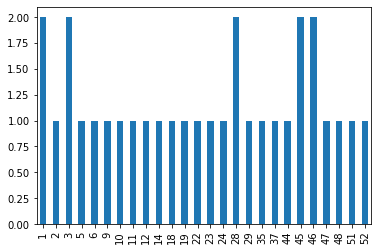

In [186]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [185]:
keanu_lead = keanu_df[keanu_df.n == 1]
keanu_lead_releases = pd.merge(keanu_lead , release_dates, how='left', on='title')
keanu_lead_releases.head(5)

,title,year_x,name,type,character,n,year_y,country,date
0,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0,2013,Japan,2013-12-06
1,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0,2013,Malaysia,2013-12-19
2,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0,2013,Singapore,2013-12-19
3,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0,2013,Taiwan,2013-12-24
4,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0,2013,Canada,2013-12-25


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

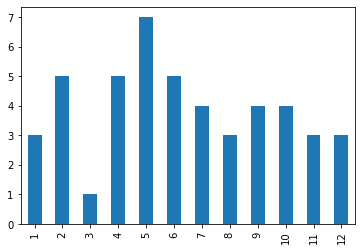

In [190]:
keanu_releases = pd.merge(keanu_df, release_dates, how = 'left', on = ['title', 'year'])
keanu_releases_us = keanu_releases[keanu_releases.country == 'USA']
keanu_releases_us.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [192]:
release_dates.columns

Index(['title', 'year', 'country', 'date'], dtype='object')

<AxesSubplot:>

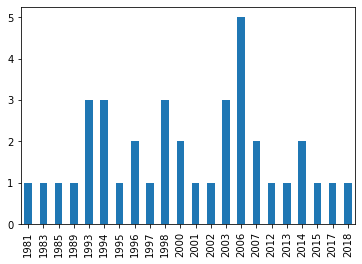

In [198]:
ian_df = cast[cast.name == 'Ian McKellen']
ian_df_release = pd.merge(ian_df, release_dates, how = 'left', on= ['title', 'year'])
ian_df_release.head()
ian_release_us = ian_df_release[ian_df_release.country == 'USA']
ian_release_us.date.dt.year.value_counts().sort_index().plot(kind='bar')